http://pymotw.com/2/glob/ >> file matching 
https://openpyxl.readthedocs.io/en/stable/usage.html
import os 
print(os.getcwd())

In [1]:
import glob, os
import openpyxl
import datetime

Create a new worksheet

In [2]:
dest_filename = './myworkbook.xlsx'
wb = openpyxl.Workbook()
sheet = wb.active
sheet.title = 'mysheet1'
sheet['A1'].value = 'name'
sheet['A2'].value = 'richie'
sheet.cell(row=3, column=1).value = 20
wb.save(dest_filename)

Open a sheet and add sheets

In [ ]:
import openpyxl
target_filename = './myworkbook.xlsx'
dest_filename = './myworkbook_after.xlsx'
wb = openpyxl.load_workbook(target_filename)
print(wb.sheetnames)
wb.create_sheet(index=0, title='mysheet0')
wb.create_sheet(title='mysheet2')
print(wb.sheetnames)
snames = wb.sheetnames
sheet = wb[snames[1]]   # wb['mysheet1']
print(sheet['A1'].value)
print(sheet['A2'].value)
wb.save(dest_filename)

Range
sheet['A1':'A9'] : A1에서 A9까지 범위 지정
sheet['B1:B9'] : B1부터 B9까지 범위 지정
sheet['1'] : 행번호 지정, 1행
sheet['A'] : 열번호 지정, A열
sheet['SheetName!A1:A5']: SheetName 시트의 A1에서 A5까지 범위 지정

a = sheet['A1':'C3']
print(a) >> ((the content of one row),(),()...), Tuple! 

In [ ]:
import openpyxl

wb = openpyxl.Workbook()
sheet = wb.active
a = sheet['A1':'B9']   # ((한 개의 행에 대한 셀의 모음), (), ())

for no, xy in enumerate(a, start=1):
    # x: row y: column
    x, y = xy 
    x.value = 2
    y.value = no

for x, y in a:
    print(f'{x.value} * {y.value} = {x.value*y.value}')
    
# only consider row
for x in sheet['1']:  # 1행 값만 검색한다. 
    print(x, x.value)   

# only consider column
a = sheet['A']
# only consider row
b = sheet['1']
print(a, b)     
wb.save('gugu.xlsx')

Accesing the values in the cells

In [ ]:
cell = sheet['B5'] 
cell.coordinate = 'B5' (read only)
cell.column = 'B' (read/write)
cell.row = 5 (read/write )
cell.col_inx = 2(read only)   

In [ ]:
import openpyxl

wb = openpyxl.load_workbook('gugu.xlsx')
sheet = wb['Sheet']
print(sheet.max_row)
print(sheet.max_column)
cell = sheet['B5']
print(type(cell))
print(cell.coordinate)
print(cell.column)
print(cell.row)
print(cell.col_idx)
cell.row = 10
print(cell.coordinate)

Create a fomular 

In [ ]:
import openpyxl

wb = openpyxl.load_workbook('gugu.xlsx')
sheet = wb['Sheet']   # wb[wb.sheetnames[0]], wb.active(시트가 하나면)
for x in sheet['C1:C9']:
    #print(x[0])
    cell = x[0] # 튜플형식이라서 셀에 접근하려면 인덱스 0으로 준다 처음것을 쓴다
    cell.value = f'=A{cell.row}*B{cell.row}'# f '=A{} * B{}'

for x in sheet['C1:C9']:
    print(x[0].value)

wb.save('gugu_2dan.xlsx')

V lookup

In [ ]:
 import openpyxl
rfilename = 'scores.xlsx'
wfilename = 'scores_after.xlsx'
wb = openpyxl.load_workbook(rfilename)
sheet = wb['report']
for x, y, z in sheet['F2:H8']:
    row = x.row
    x.value = f'=sum(C{row}:E{row})'
    y.value = f'=average(C{row}:E{row})'
    z.value = f'=iferror(hlookup(G{row},table_data!$A$1:$F$2, 2, TRUE),"X")'

wb.save(wfilename)  

Insert row/ Column

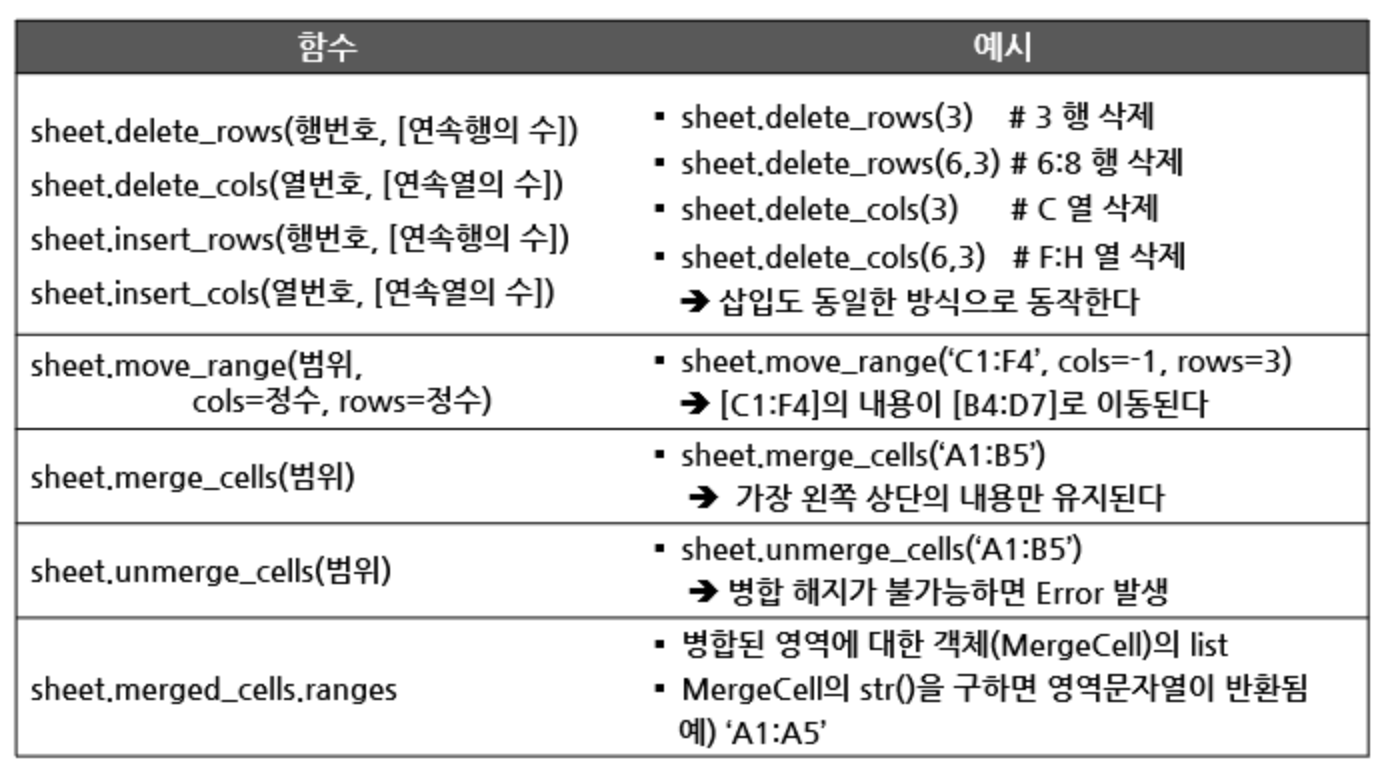

In [ ]:
# 삭제/삽입 수행 후에는 행/열 번호가 변경 되기 때문에 주의 해야 한다
# B 열을 삭제하면, 뒤에 있던 C 열이 B열이 된다
# B,E,F,G를 삭제하기 위한 방법은 다음과 같다
# 2번 삭제 후, 4번부터 3개 열을 삭제하거나, 2번 삭제 후, 4번을 세 번 삭제 한다

import openpyxl
rfilename = 'simpleTable.xlsx'
wfilename = 'simpleTable_after.xlsx'
wb = openpyxl.load_workbook(rfilename)
sheet = wb.active
sheet.delete_cols(2)
sheet.delete_cols(4,3)
wb.save(wfilename)  
print('Done Write simpleTable_after.xlsx')  

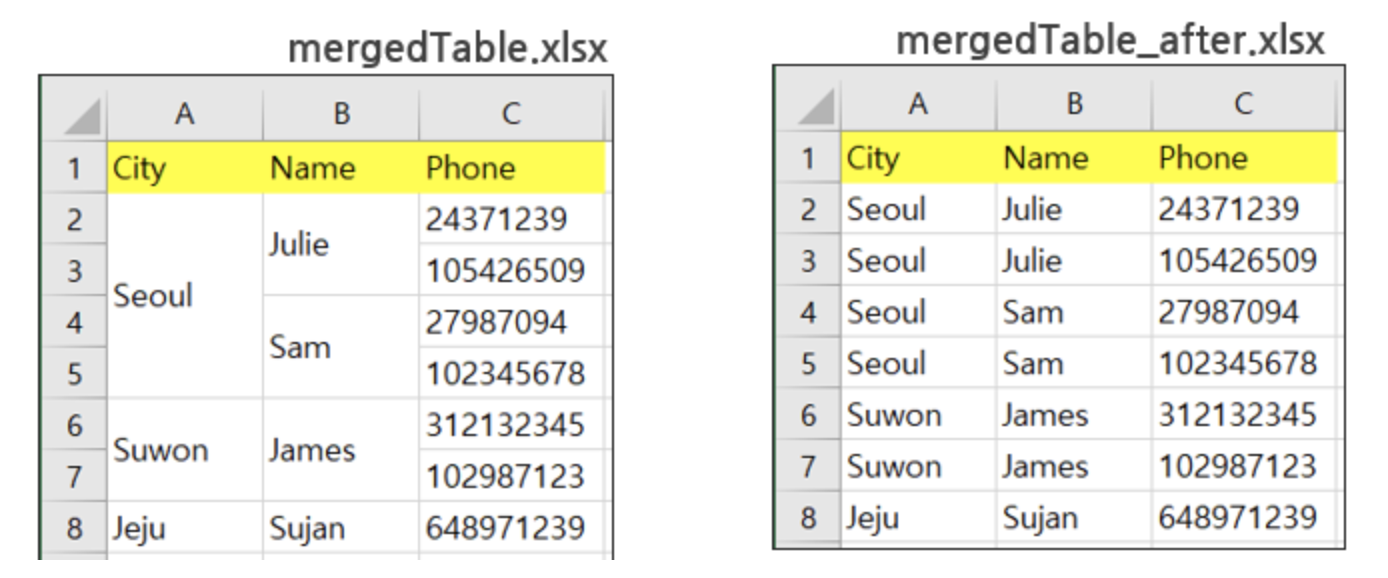

In [ ]:
# 해제한 뒤에는 같은 내용으로 병합되었던 셀을 채우기 한다
# sheet.merged_cells.ranges 의 각 항(MergeCell object)에 대해서 str()을 취한 것을 x라고 할 때,
# sheet.unmerge_cells( x ) 하게 되면 병합이 해제 된다
# MergeCell 객체는 str()을 취하면 범위가 문자열로 반환된다 (예 ‘A1:B5’) 
# sheet.merged_cells.ranges를 copy 모듈을 사용해 복사해 사용해야 한다
import openpyxl
import copy

rfilename = 'mergedTable.xlsx'
wfilename = 'mergedTable_after.xlsx'

def copy_value(rng, sheet):
    value = sheet[rng][0][0].value
    for row in sheet[rng]:
        for col in row:
            col.value = value

wb = openpyxl.load_workbook(rfilename)
sheet = wb.active
mcells = copy.copy(sheet.merged_cells.ranges)
for rng in mcells:
    print(type(rng), str(rng))
    rng = str(rng)
    sheet.unmerge_cells(rng)
    copy_value(rng, sheet)
wb.save(wfilename)  

In [ ]:
# 전체 병합 해제 작업은 pandas를 사용하면 쉽게 해결된다
# 다만 pandas는 정형적인 형태의 테이블 형식으로 된 파일이 사용되어야 한다
import pandas as pd

df = pd.read_excel('mergedTable.xlsx')
df = df.fillna(method='ffill')
print(df)
df.to_excel('mergedTable_after2.xlsx', index=False)

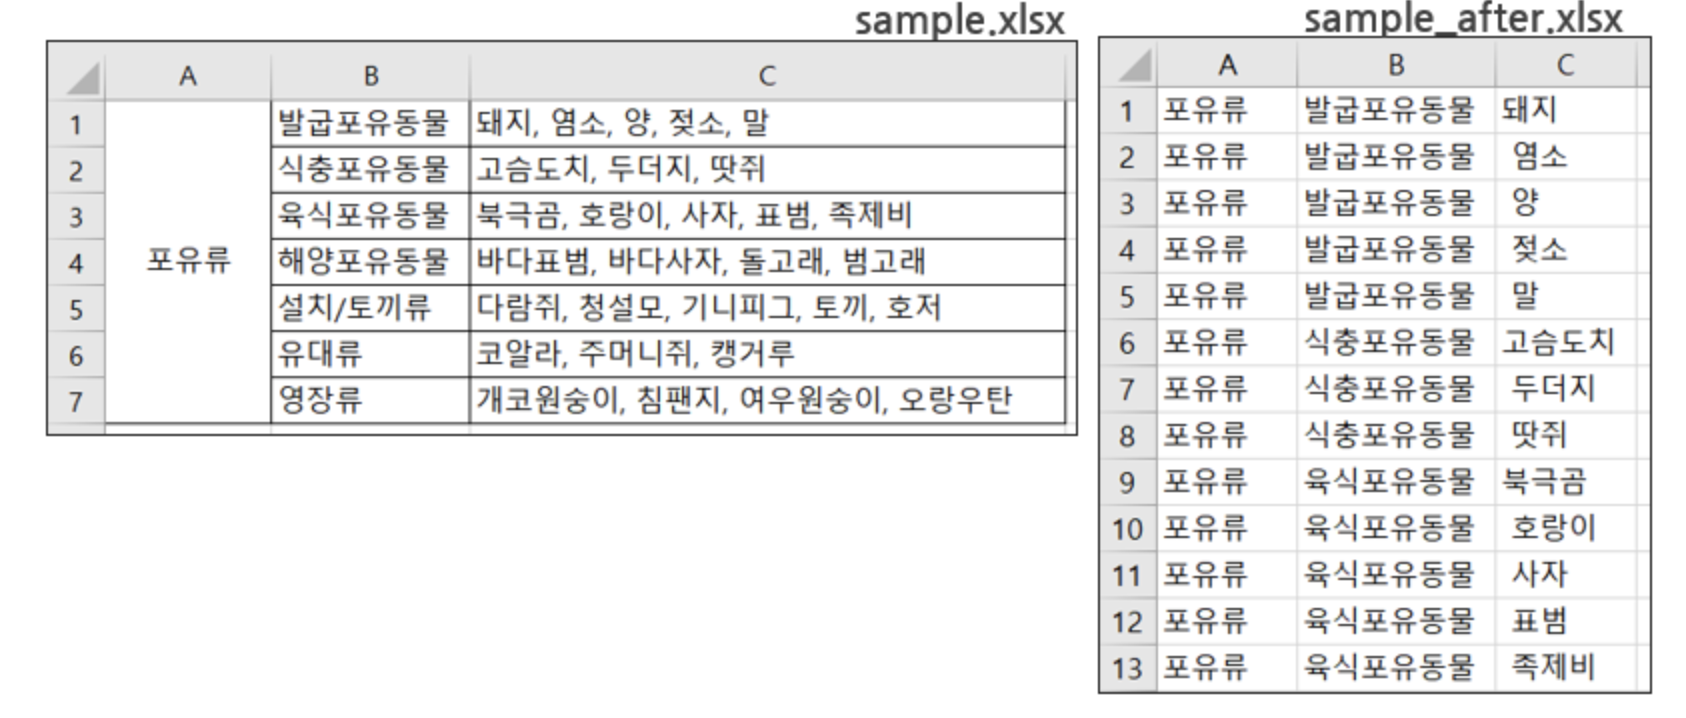

In [ ]:
import openpyxl

rfilename = 'sample.xlsx'
wfilename = 'sample_after.xlsx'

wb_a = openpyxl.load_workbook(rfilename)
sheet_a = wb_a.active
wb_b = openpyxl.Workbook()
sheet_b = wb_b.active
A = sheet_a['A1'].value
#print(A)
lineno = 0
for B, C in sheet_a['B1':'C7']:
    #print(B.value, C.value)
    B = B.value    
    C = [x.strip() for x in C.value.split(',')]
    #print(B, C)    
    for x in C:
        lineno += 1
        sheet_b[f'A{lineno}'].value = A
        sheet_b[f'B{lineno}'].value = B
        sheet_b[f'C{lineno}'].value = x
        print(A, B, x)
wb_b.save(wfilename) 

handling several sheets

In [ ]:
import glob, os
import openpyxl
import datetime

def removeCols(sheet, eidx):
    for x in range(2, eidx+1):
        sheet.delete_cols(x)

def removeRows(sheet, eidx):
    for x in range(2, eidx+1):
        sheet.delete_rows(x)
        
def insertTitle(sheet, title):
    sheet.insert_rows(1)
    for col, x in zip('ABCDEFGH', title):
        sheet[col+'1'] = x
            
title = ['항공사', '편명', '출발지', '계획', '예상',
         '도착', '구분', '현황']
rdpath = '../flight/'
wtpath = '../flight/step1/'

stime = datetime.datetime.now()      
for filename in glob.glob(rdpath+'인천도착*.xlsx'):
    wb = openpyxl.load_workbook(filename)
    for sname in wb.sheetnames:        
        sheet = wb[sname]  
        removeCols(sheet, sheet.max_column//2 + 1)
        removeRows(sheet, sheet.max_row//2 + 1)
        insertTitle(sheet, title)
    name = os.path.basename(filename)
    print(name)
    wb.save(wtpath+name)
etime = datetime.datetime.now()
print(etime - stime)

In [ ]:
import glob, os
import pandas as pd
import datetime

title = ['항공사', '편명', '출발지', '계획', '예상',
         '도착', '구분', '현황']
       
stime = datetime.datetime.now()
for filename in glob.glob(r'../flight/*.xlsx'):
    xlsx = pd.ExcelFile(filename)
    writer = pd.ExcelWriter('../flight/step2/' + os.path.basename(filename))    
    for sname in xlsx.sheet_names:
        df = pd.read_excel(xlsx, sname, header=None)
        df = df.iloc[0::2, 0::2] 
        df.columns = title   
        df.to_excel(writer, sheet_name=sname, index=False)        
    print(os.path.basename(filename))        
    writer.save()
    
etime = datetime.datetime.now()
print(etime - stime)

https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html